In [52]:
import geopandas as gpd
import geoplot as gplt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon
from overlap_measure import compute_point_distribution_grid

In [53]:
points = gpd.read_file("test_nigeria_water_points.geojson")

<Axes: >

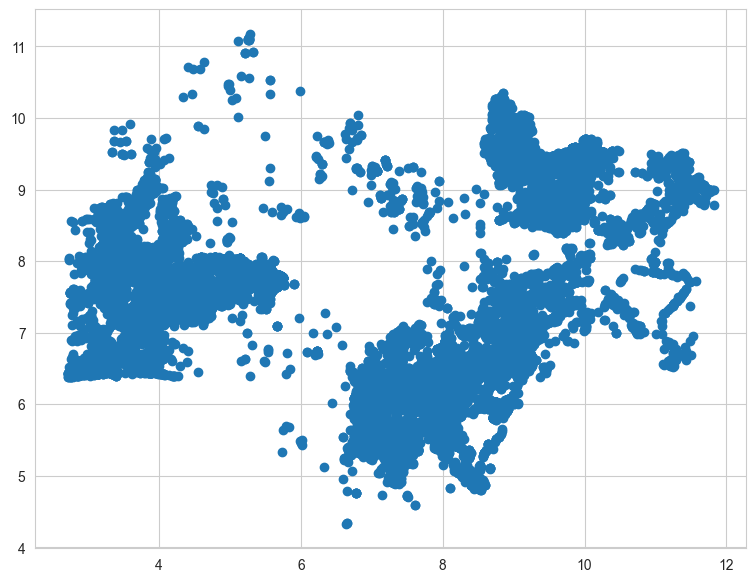

In [54]:
_, ax = plt.subplots(figsize=(10, 7))
points.plot(ax=ax)

In [55]:
pdg = compute_point_distribution_grid(
    points=points,
    figsize=(10, 7),
    s=7
)

<Axes: >

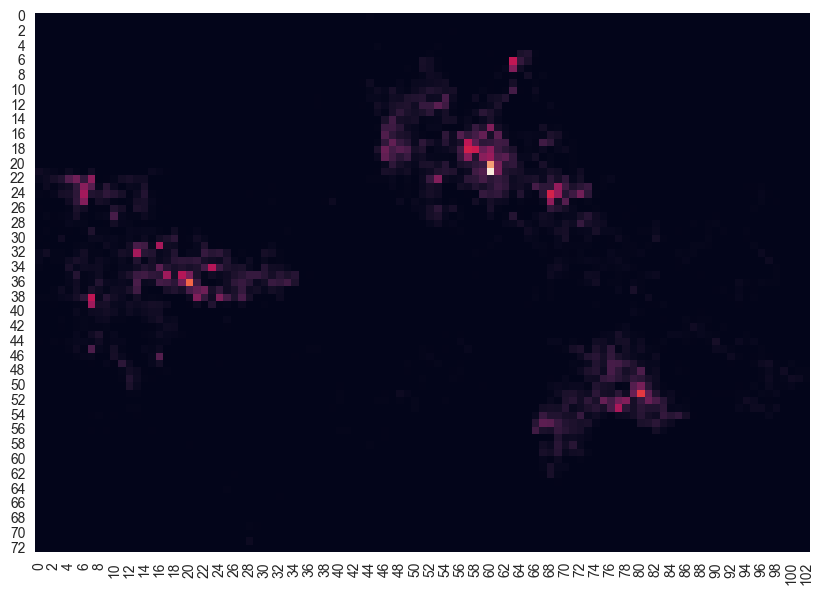

In [56]:
_, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(pdg, ax=ax, cbar=False)

In [57]:
# water_points = gpd.read_file("test_nigeria_water_points.geojson")
water_points = gpd.GeoDataFrame(geometry=[
    Point(1, 1), Point(1, 1), Point(1, 1), Point(1, 1), Point(0, 0), Point(0, 1), Point(1, 0)
])
water_points

,geometry
0,POINT (1.00000 1.00000)
1,POINT (1.00000 1.00000)
2,POINT (1.00000 1.00000)
3,POINT (1.00000 1.00000)
4,POINT (0.00000 0.00000)
5,POINT (0.00000 1.00000)
6,POINT (1.00000 0.00000)


In [58]:
water_points.total_bounds

array([0., 0., 1., 1.])

In [59]:
figsize = (10, 7)
point_size = 7 * (1 / 72)
grid_cell_size = point_size

In [60]:
# Get the bounds of the water points data
bounds = water_points.total_bounds

c_width = abs(bounds[2] - bounds[0])
c_height = abs(bounds[3] - bounds[1])

i_width = figsize[0]
i_height = figsize[1]

c_width_ratio = c_width / i_width
c_height_ratio = c_height / i_height

# Rescale the x and y coordinates to figure coordinates
x = water_points.geometry.x
y = water_points.geometry.y
x = (x - bounds[0]) / c_width_ratio
y = (y - bounds[1]) / c_height_ratio

In [61]:
rescaled_data = gpd.GeoDataFrame(geometry=gpd.points_from_xy(x, y))
print(rescaled_data.total_bounds)
rescaled_data

[ 0.  0. 10.  7.]


,geometry
0,POINT (10.00000 7.00000)
1,POINT (10.00000 7.00000)
2,POINT (10.00000 7.00000)
3,POINT (10.00000 7.00000)
4,POINT (0.00000 0.00000)
5,POINT (0.00000 7.00000)
6,POINT (10.00000 0.00000)


In [62]:
cell = Polygon([(9, 6), (9, 7), (10, 7), (10, 6)])
cell.bounds

(9.0, 6.0, 10.0, 7.0)

In [63]:
rescaled_data.geometry.intersects(cell)

0     True
1     True
2     True
3     True
4    False
5    False
6    False
dtype: bool

<Axes: >

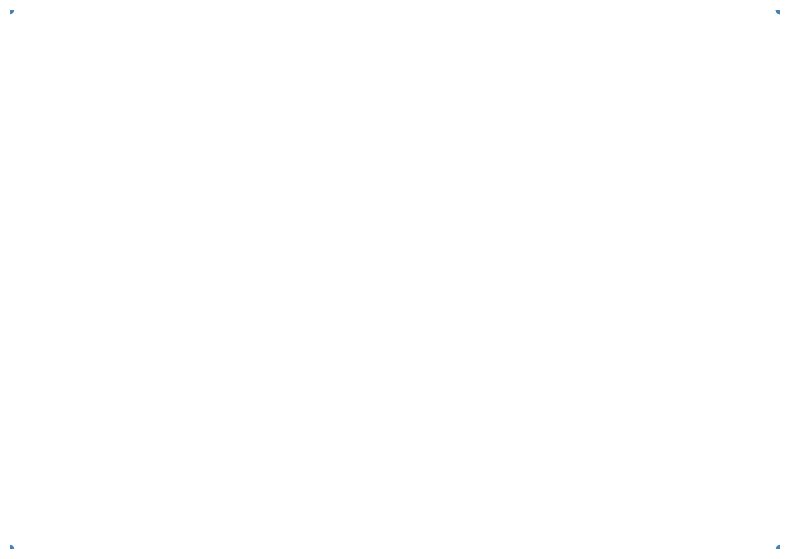

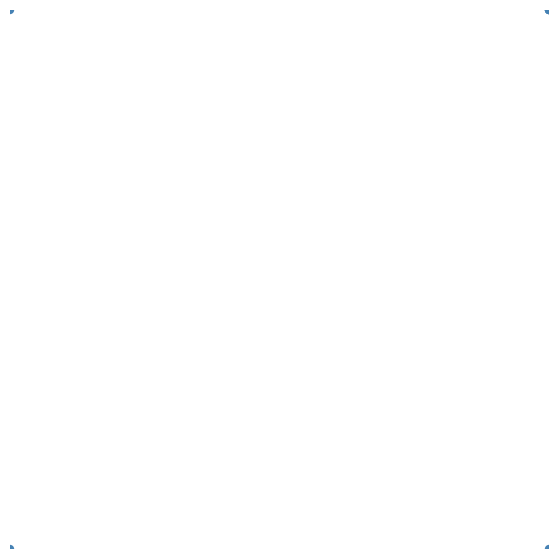

In [64]:
# Plot rescaled points
gplt.pointplot(rescaled_data, figsize=figsize, extent=(0, 0, i_width, i_height))
gplt.pointplot(water_points, figsize=figsize, extent=bounds)

In [65]:
grid_cell_size, figsize

(0.09722222222222221, (10, 7))

In [66]:
num_cells = np.ceil([i_height / grid_cell_size, i_width / grid_cell_size]).astype(int)
cells = np.zeros(num_cells).astype(int)
num_cells

array([ 73, 103])

In [67]:
rescaled_data

,geometry
0,POINT (10.00000 7.00000)
1,POINT (10.00000 7.00000)
2,POINT (10.00000 7.00000)
3,POINT (10.00000 7.00000)
4,POINT (0.00000 0.00000)
5,POINT (0.00000 7.00000)
6,POINT (10.00000 0.00000)


In [68]:
col = 72
row = 102
x_min = col * grid_cell_size
x_max = (col + 1) * grid_cell_size
y_min = row * grid_cell_size
y_max = (row + 1) * grid_cell_size

grid_cell = Polygon([(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min)])
grid_cell.bounds

(6.999999999999999, 9.916666666666666, 7.097222222222221, 10.013888888888888)

In [69]:
rescaled_data.geometry.intersects(grid_cell)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [70]:
# Without considering point area

for row in range(num_cells[0]):
    for col in range(num_cells[1]):
        x_min = col * grid_cell_size
        x_max = (col + 1) * grid_cell_size
        y_min = row * grid_cell_size
        y_max = (row + 1) * grid_cell_size

        grid_cell = Polygon([(x_min, y_min), (x_min, y_max), (x_max, y_max), (x_max, y_min)])
        # print(grid_cell.area)
        # print(water_points.geometry.intersects(grid))
        cells[row, col] = np.sum(rescaled_data.geometry.intersects(grid_cell))
        if cells[row, col] > 0:
            print(row, col, cells[row, col])

        # x_in_range = (x >= x_min) & (x < x_max)
        # y_in_range = (y >= y_min) & (y < y_max)

        # cells[row, col] = np.sum(x_in_range & y_in_range)

0 0 1
0 102 1
72 0 1
72 102 4


In [71]:
cells.sum()

7

<Axes: >

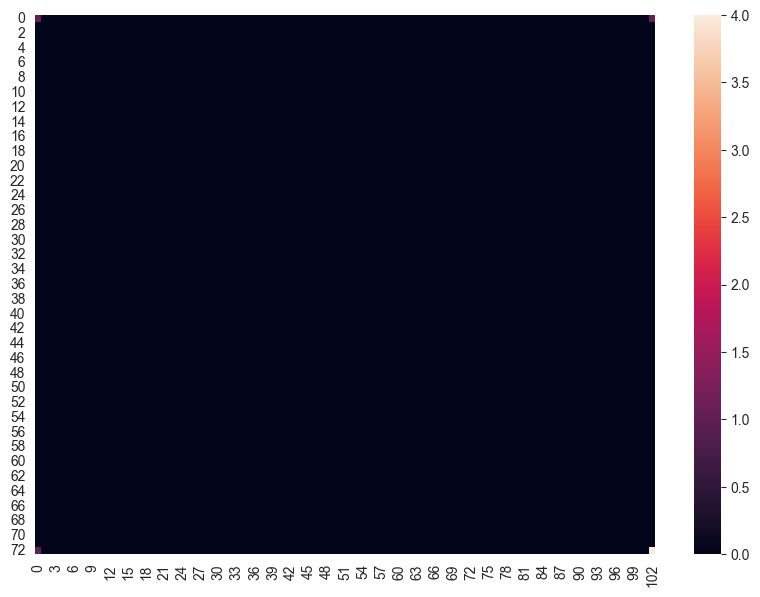

In [72]:
fig, ax = plt.subplots(figsize=figsize)
sns.heatmap(cells, ax=ax)

<Axes: >

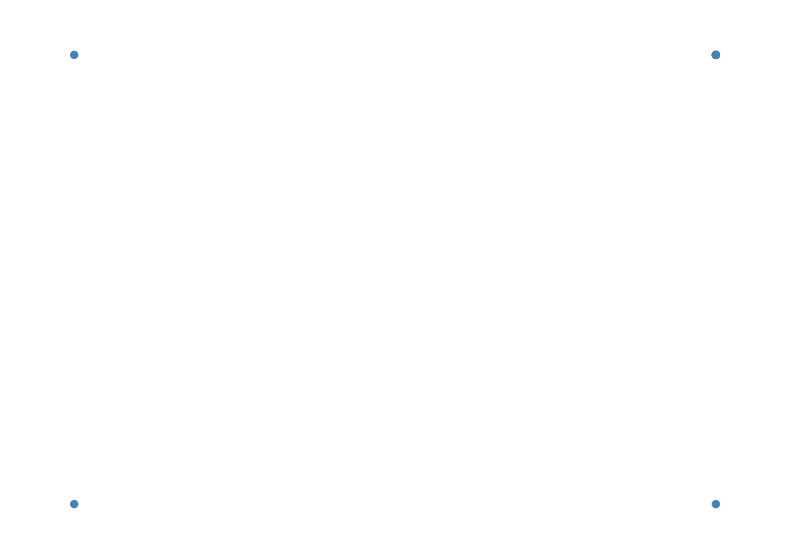

In [73]:
gplt.pointplot(rescaled_data, figsize=figsize)

In [74]:
cells.max()

4

In [75]:
points_grid = compute_overlap_grid(
    points=gpd.read_file("test_nigeria_water_points.geojson"),
    figsize=(10, 7),
    s=7
)

NameError: name 'compute_overlap_grid' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(points_grid, ax=ax)